<a href="https://colab.research.google.com/github/johnpharmd/DS-Unit-2-Sprint-2-Linear-Regression/blob/master/Linear_Regression_Sprint_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import everything you could ever need. ;)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# Ukraine Used Car Sale Price Prediction
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/car_regression.csv')
print(df.shape)
df.head()

(8495, 9)


,make,price,body,mileage,engV,engType,registration,year,drive
0,23,15500.0,0,68,2.5,1,1,2010,1
1,50,20500.0,3,173,1.8,1,1,2011,2
2,50,35000.0,2,135,5.5,3,1,2008,2
3,50,17800.0,5,162,1.8,0,1,2012,0
4,55,16600.0,0,83,2.0,3,1,2013,1


In [3]:
df1 = df.copy()
df1.isna().sum()  # Thanks, Ryan A., for the clean dataset!

make            0
price           0
body            0
mileage         0
engV            0
engType         0
registration    0
year            0
drive           0
dtype: int64

# Predictive Modeling with Linear Regression

## 1.1 Divide the dataset features into an X matrix and y vector ("price" is what we want to predict).

In [0]:
X = df1[['year', 'mileage']]
y = df1['price']

## 1.2 Split the data into test and train datasets using train_test_split

In [0]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.5, random_state=42)

## 1.3 Use Scikit-Learn to fit a multiple regression model using your training data.

In [0]:
# Format X_train and y_train
X_train = X_train.values[:, np.newaxis]
y_train = y_train.values



## 1.4 Report the Intercept and Coefficient Values for the fitted model

In [9]:
# Train regression model on X_train and y_train
lin_reg = LinearRegression().fit(X_train, y_train)
print('Intercept Value:', lin_reg.intercept_)
print('Slope Coefficient:', lin_reg.coef_)

Intercept Value: -2044000.1475451824
Slope Coefficient: [1029.53063214  -42.09855522]


## 1.5 Use the test data to make predictions

In [10]:
# Relationship between Beta and X, Y, and Z:
# Beta0 = intercept; Beta1 = year coefficient; Beta2 = mileage coefficient; thus
# Z = Beta0 + Beta1 * X + Beta2 * Y 

# Model year 2009 car with 100 miles on odometer
price_prediction_1 = -2044000.1475451824 + (1029.53063214*2009) + (-42.09855522*100)
print('price prediction for 2009 year car with 100 miles:', int(price_prediction_1))
price_prediction_2 = -2044000.1475451824 + (1029.53063214*2013) + (-42.09855522*50)
print('price prediction for 2013 year car with 50 miles:', int(price_prediction_2))

price prediction for 2009 year car with 100 miles: 20117
price prediction for 2013 year car with 50 miles: 26340


## 1.6 Calculate and report both the Root-Mean-Square error and $R^2$ for the model. 

In [11]:
y_test_predict = lin_reg.predict(X_test)

# MSE = mean_squared_error(y_test, y_test_predict)
RMSE = (np.sqrt(mean_squared_error(y_test, y_test_predict)))

# print('MSE is {}'.format(MSE))
print('RMSE is {}'.format(RMSE))

R2 = r2_score(y_test, y_test_predict)

print('R^2 is {}'.format(R2))

RMSE is 23969.863358092745
R^2 is 0.16867307432917644


## 1.7 How should we interpret the coefficient corresponding to the "year" feature?

As year becomes greater, ie, car is newer, "year" coefficient increases price by about 1029.53063214 times year. 

## 1.8 How should we interpret the Root-Mean-Square Error?

RMSE is an estimate of the differences between values observed in dataset and values predicted by a model.
[see also https://en.wikipedia.org/wiki/Root-mean-square_deviation]

## 1.9 How should we interpret the $R^2$?

For this example, R^2 is the amount of the variance in price that can be predicted from multiple regression on the combination of the year and mileage features. 

# Log-Linear and Polynomial Regression

## 2.1 Engineer a new variable by taking the log of the price variable.

In [0]:
df1['price'] = np.log(df1['price'])

## 2.2 Use scatterplots or seaborn's pairplot function to do the "eyeball test" for non-linearly distributed features.

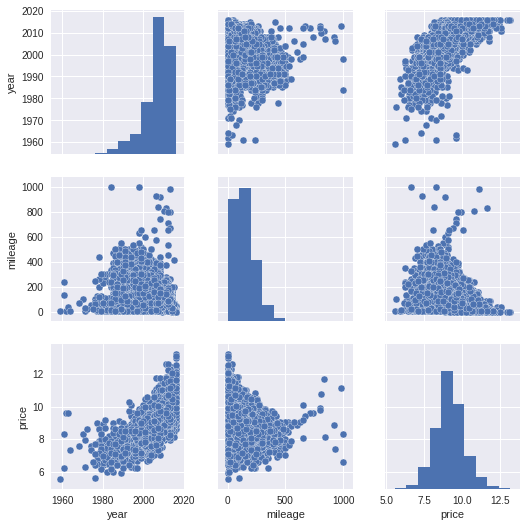

In [16]:
sns.pairplot(df1[['year', 'mileage', 'price']]);

## 2.3 If appropriate, create any polynomial features. 

In [0]:
# create polynomial feature using df['mileage']
from sklearn.preprocessing import PolynomialFeatures

polynomial_features = PolynomialFeatures()

## 2.4 Use the new log-transformed y variable and your x variables (including any new polynomial features) to fit a new linear regression model. Then report the: intercept, coefficients, RMSE, and $R^2$.

## 2.5 How might we interpret the coefficient on "year" in this new regression model?

# Gradient Descent

## 3.1 What does Gradient Descent seek to minimize?

## 3.2 What is the "Learning Rate" and what is its function?

# Model Diagnostics

## 4.1 Use statsmodels to run a log-linear or log-polynomial linear regression with robust standard errors.

## 4.2 Calculate the Variance Inflation Factor (VIF) of our X variables. Do we have multicollinearity problems?